In [109]:
# QUESTION 1
import sqlite3


# to create a Sqlite database
file = "coursework.db"

# to connect to the database
con1=sqlite3.connect("coursework")

con1=sqlite3.connect("coursework", isolation_level=None)
con1=sqlite3.connect("coursework", timeout=10)

cur=con1.cursor()
print("connected")
con1.commit()


connected


In [110]:
import sqlite3

 #to connect to the database
con1=sqlite3.connect("coursework")

con1=sqlite3.connect("coursework", isolation_level=None)
con1=sqlite3.connect("coursework", timeout=10)

cur.execute("DROP TABLE IF EXISTS CarSharing")
con1.commit()

#to create a table CarSharing

cur.execute('''CREATE TABLE CarSharing
           (id integer primary key,
              timestamp time,
                season text,
               holiday text,
               workingday text,
                weather text,
                temp integer,
                temp_feel integer, 
                humidity integer,
                windspeed,
                demand integer 
                )''')
con1.commit()
print("Table created successfully")






Table created successfully


In [134]:
# Copy csv data files into the Carsharing table

with open('workdata.csv', 'r') as file:
    no_records = 0
    for row in file.readlines()[1:]:
        no_records +=1
        print("\rInserting record " + str(no_records) ,end="")
        cur.execute("INSERT INTO CarSharing VALUES(?,?,?,?,?,?,?,?,?,?,?)", row.split(","))
        con1.commit()
    print("\nFinished inserting records")


    
    

Inserting record 8708
Finished inserting records


In [135]:
import sqlite3
con1 = sqlite3.connect("coursework",isolation_level=None)
con1=sqlite3.connect("coursework", timeout=10)

cur = con1.cursor()
cur.execute("""select * from CarSharing
LIMIT 2;""")
print([dec[0] for dec in cur.description])
rows=cur.fetchall()
for row in rows:
 print(row)

con1.commit()




['id', 'timestamp', 'season', 'holiday', 'workingday', 'weather', 'temp', 'temp_feel', 'humidity', 'windspeed', 'demand']
(1, '1/1/2017 0:00', 'spring', 'No', 'No', 'Clear or partly cloudy', 9.84, 14.395, 81, '0', 2.772588722)
(2, '1/1/2017 1:00', 'spring', 'No', 'No', 'Clear or partly cloudy', 9.02, 13.635, 80, '0', 3.688879454)


In [77]:
# To Create a Backup table called Copy

import sqlite3
con1 = sqlite3.connect("coursework",isolation_level=None)
con1=sqlite3.connect("coursework", timeout=5)
cur = con1.cursor()

cur.execute("DROP TABLE IF EXISTS Copy")
con1.commit()
    
cur.execute("""CREATE TABLE Copy AS SELECT * from CarSharing;""")

    
con1.commit()
print("Table created successfully")





Table created successfully


In [73]:
# to check for table creation

import sqlite3
con1 = sqlite3.connect("coursework",isolation_level=None)
con1=sqlite3.connect("coursework", timeout=5)
cur = con1.cursor()
 
cur.execute("""SELECT* from Copy limit 3;""")
print([dec[0] for dec in cur.description])
rows=cur.fetchall()
for row in rows:
        print(row)
    
con1.close()



['id', 'timestamp', 'season', 'holiday', 'workingday', 'weather', 'temp', 'temp_feel', 'humidity', 'windspeed', 'demand']
(1, '1/1/2017 0:00', 'spring', 'No', 'No', 'Clear or partly cloudy', 9.84, 14.395, 81, '0', 2.772588722)
(2, '1/1/2017 1:00', 'spring', 'No', 'No', 'Clear or partly cloudy', 9.02, 13.635, 80, '0', 3.688879454)
(3, '1/1/2017 2:00', 'spring', 'No', 'No', 'Clear or partly cloudy', 9.02, 13.635, 80, '0', 3.465735903)


In [267]:
#QUESTION 2
# to add a column called temp-category

cur.execute("""ALTER TABLE CarSharing
          ADD COLUMN temp_category AS 
          (
          CASE
              WHEN temp_feel <10  THEN "Cold"
              WHEN temp_feel BETWEEN 10 AND 25 THEN "Mild"
              WHEN temp_feel = "" THEN "null"
              ELSE "Hot"
            END);""")

con1.commit()

In [284]:
#QUESTION 3
# To create table temperature and add columns accordingly
cur.execute("CREATE TABLE temperature AS SELECT temp,temp_feel,temp_category from CarSharing;")


# To confirm if table was created successfully and columns populated

cur.execute("""SELECT * FROM temperature 
            limit 3;""")
print([dec[0] for dec in cur.description])
rows=cur.fetchall()
for row in rows:
        print(row)
con1.commit()

['temp', 'temp_feel', 'temp_category']
(9.84, 14.395, 'Mild')
(9.02, 13.635, 'Mild')
(9.02, 13.635, 'Mild')


In [ ]:
# To drop the temp column from CarSharing table

import sqlite3
con1 = sqlite3.connect("coursework",isolation_level=None)
con1=sqlite3.connect("coursework", timeout=5)
cur = con1.cursor()

cur.execute("""ALTER TABLE CarSharing
               DROP COLUMN temp;""")         

con1.commit()


# To drop the temp_feel columns from CarSharing table

import sqlite3
con1 = sqlite3.connect("coursework",isolation_level=None)
con1=sqlite3.connect("coursework", timeout=5)
cur = con1.cursor()

cur.execute("""ALTER TABLE CarSharing
               DROP COLUMN temp_feel;""")           

con1.commit()


In [90]:
#QUESTION 4
# to find how many weather type in the weather column

cur.execute(" SELECT DISTINCT(weather) from CarSharing")

print([dec[0] for dec in cur.description])
rows=cur.fetchall()
for row in rows:
        print(row)
con1.commit()


# to find the distinct values of the weather column
cur.execute("""ALTER TABLE CarSharing
          ADD COLUMN weather_code AS 
          (
           CASE
           WHEN weather = "Clear or partly cloudy" THEN  "1"
           WHEN weather = "Mist" THEN "2"
           WHEN weather = "Light snow or rain" THEN "3"
           ELSE "4"
           END);""")

# to check the new column weather_code has been created.

cur.execute("""SELECT DISTINCT(weather), weather_code from CarSharing 
         LIMIT 5;""")

print([dec[0] for dec in cur.description])
rows=cur.fetchall()
for row in rows:
        print(row)
con1.commit()

['weather', 'weather_code']
('Clear or partly cloudy', '1')
('Mist', '2')
('Light snow or rain', '3')
('heavy rain/ice pellets/snow + fog', '4')


In [321]:
#QUESTION 5
#To create Table copy named weather with columns (weather and weather_code)

import sqlite3
con1 = sqlite3.connect("coursework",isolation_level=None)
con1=sqlite3.connect("coursework", timeout=5)
cur = con1.cursor()

cur.execute("CREATE TABLE weather AS SELECT weather, weather_code from CarSharing;")

con1.commit()


#To check if Table copy named weather has been created

cur.execute("SELECT weather, weather_code from weather LIMIT 5;")

print([dec[0] for dec in cur.description])
rows=cur.fetchall()
for row in rows:
        print(row)
con1.commit()

#to drop the weather column from the CarSharing table

cur.execute("""ALTER TABLE CarSharing
               DROP COLUMN weather;""")           

con1.commit()


OperationalError: error in table CarSharing after drop column: no such column: weather

In [106]:
# QUESTION 6

#To create Table named time with the timestamps, Hour, Dayname, Monthname

import sqlite3
con1 = sqlite3.connect("coursework",isolation_level=None)
con1=sqlite3.connect("coursework", timeout=5)
cur = con1.cursor()
  
cur.executescript('''CREATE TABLE time AS SELECT
 CASE CAST 
 (strftime('%w', date(timestamp)) AS integer)
  WHEN 0 THEN 'Sunday'
  WHEN 1 THEN 'Monday'
  WHEN 2 THEN 'Tuesday'
  WHEN 3 THEN 'Wednesday'
  WHEN 4 THEN 'Thursday'
  WHEN 5 THEN 'Friday'
  ELSE 'Saturday'
  END AS weekdayname,
  CASE CAST
  (strftime('%H', datetime(timestamp)) as integer)
  when "00" then  '12AM'
  when "01" then   '1AM'
  when "02" then   '2AM'
  when "03" then   '3AM'
  when "04" then   '4AM'
  when "05" then   '5AM'
  when "06" then   '6AM'
  when "07" then   '7AM'
  when "08" then   '8AM'
  when "09" then   '9AM'
  when "10" then '10AM'
  when "11" then '11AM'
  when "12" then '12PM'
  when "13" then '1PM'
  when "14" then '2PM'
  when "15" then '3PM'
  when "16" then '4PM'
  when "17" then '5PM'
  when "18" then '6PM'
  when "19" then '7PM'
  when "20" then '8PM'
  when "21" then '9PM'
  when "22" then '10PM'
  ELSE '11PM' END as hour,
 CASE CAST 
 (strftime('%m', date(timestamp)) as integer)
  when '01' then 'January'
  when '02' then 'February'
  when '03' then 'March'
  when '04' then 'April'
  when '05' then 'May'
  when '06' then 'June'
  when '07' then 'July'
  when '08' then 'August'
  when '09' then 'September'
  when '10' then 'October'
  when '11' then 'November'
  ELSE 'December' END AS monthname, timestamp from CarSharing;''') 





In [112]:
# QUESTION 7(a)
# To get the date and time with the highest demand rate in 2017
cur.execute("""SELECT MAX(demand), 
               strftime('%d/%m',(substr(timestamp,7,4) || '-'|| substr(timestamp,4,2) || '-'|| substr(timestamp,1,2)) ) AS DATE, 
               strftime('%H/%M',(substr(timestamp,7,4) || '-'|| substr(timestamp,4,2) || '-'|| substr(timestamp,1,2)) ) AS TIME,
               strftime('%Y',(substr(timestamp,7,4) || '-'|| substr(timestamp,4,2) || '-'|| substr(timestamp,1,2)) ) AS YEAR FROM CarSharing WHERE YEAR = '2017';""")

print([dec[0] for dec in cur.description])
rows=cur.fetchall()
for row in rows:
        print(row)


# QUESTION 7(b)
# To get the date and time with the highest demand rate in 2017

cur.execute("""SELECT season as Period, MIN(average) as AverageDemand, "Season Min" as Comment FROM (SELECT season,AVG(demand) as average FROM time JOIN CarSharing on time.timestamp=CarSharing.timestamp WHERE CarSharing.timestamp LIKE '%2017%' GROUP BY Carsharing.season ) 
 UNION SELECT season, MAX(average), "Season Max" as Comment FROM (SELECT season, AVG(demand) as average FROM time JOIN CarSharing on time.timestamp=CarSharing.timestamp WHERE CarSharing.timestamp LIKE '%2017%' GROUP BY Carsharing.season)
 union
 SELECT weekdayname, MIN(average), "Weekday Min" as Comment FROM (SELECT weekdayname,AVG(demand) as average FROM time JOIN CarSharing on time.timestamp=CarSharing.timestamp WHERE CarSharing.timestamp LIKE '%2017%' GROUP BY weekdayname) 
 UNION SELECT weekdayname, MAX(average), "Weekday Max" as Comment FROM (SELECT weekdayname, AVG(demand) as average FROM time JOIN CarSharing on time.timestamp=CarSharing.timestamp WHERE CarSharing.timestamp LIKE '%2017%' GROUP BY weekdayname)
 union
 SELECT monthname, MIN(average), "Month Min" as Comment FROM (SELECT monthname,AVG(demand) as average FROM time JOIN CarSharing on time.timestamp=CarSharing.timestamp WHERE CarSharing.timestamp LIKE '%2017%' GROUP BY monthname) 
 UNION SELECT monthname, MAX(average), "Month Max" as Comment FROM (SELECT monthname, AVG(demand) as average FROM time JOIN CarSharing on time.timestamp=CarSharing.timestamp WHERE CarSharing.timestamp LIKE '%2017%' GROUP BY monthname
 );""")

print([dec[0] for dec in cur.description])
rows=cur.fetchall()
for row in rows:
        print(row)



['MAX(demand)', 'DATE', 'TIME', 'YEAR']
(6.403574198, '10/11', '00/00', '2017')
['Period', 'AverageDemand', 'Comment']
('December', 4.290826991109184, 'Month Max')
('December', 4.290826991109184, 'Month Min')
('Saturday', 4.290826991109184, 'Weekday Max')
('Saturday', 4.290826991109184, 'Weekday Min')
('fall', 4.6602701804747255, 'Season Max')
('spring', 3.606853340319733, 'Season Min')


In [114]:
                        #PART 1.2   (Data Analytics)
#QUESTION 1
#To import the CarSharing table into a CSV file and preprocess it with python.

import pandas as pd #importing pandas 
# reading the carsharing file 
data = pd.read_csv(r'C:\Users\pc\Desktop\SQL\CarSharing.csv')
removed_data_dublicate = data.drop_duplicates()  # remove duplicates from data 
removed_data_null = removed_data_dublicate.dropna() # remove rows where values are null
print(removed_data_null)





        id            timestamp  season holiday workingday  \
0        1  2017-01-01 00:00:00  spring      No         No   
1        2  2017-01-01 01:00:00  spring      No         No   
2        3  2017-01-01 02:00:00  spring      No         No   
3        4  2017-01-01 03:00:00  spring      No         No   
4        5  2017-01-01 04:00:00  spring      No         No   
...    ...                  ...     ...     ...        ...   
8703  8704  2018-08-05 00:00:00    fall      No         No   
8704  8705  2018-08-05 01:00:00    fall      No         No   
8705  8706  2018-08-05 02:00:00    fall      No         No   
8706  8707  2018-08-05 03:00:00    fall      No         No   
8707  8708  2018-08-05 04:00:00    fall      No         No   

                     weather   temp  temp_feel  humidity  windspeed    demand  
0     Clear or partly cloudy   9.84     14.395      81.0     0.0000  2.772589  
1     Clear or partly cloudy   9.02     13.635      80.0     0.0000  3.688879  
2     Clear or 

In [116]:
#QUESTION 2
#To determine if there is a significant relationship between each column and the demand rate.

import pandas as pd   # import pandas
import statsmodels.api as sm  # import statsmodel
from statsmodels.formula.api import ols
import scipy.stats as stats # import stats
import numpy as np

data = pd.read_csv(r'C:\Users\pc\Desktop\SQL\CarSharing.csv') # reading the carsharing file 
removed_data_dublicate = data.drop_duplicates()  # remove duplicates from data 
removed_data_null = removed_data_dublicate.dropna() # remove rows where values are null

# 2-way ANOVA Test of season and demand rate
data_model1 = ols('demand ~ season', data = removed_data_null).fit()
anova_result1 = sm.stats.anova_lm(data_model1, typ= 2)
print(anova_result1)

# 2-way ANOVA Test of holiday and demand rate
data_model2 = ols('demand ~ holiday', data = removed_data_null).fit()
anova_result2 = sm.stats.anova_lm(data_model2, typ= 2)
print(anova_result2)

# 2-way ANOVA Test of workingday and demand rate
data_model3 = ols('demand ~ workingday', data = removed_data_null).fit()
anova_result3 = sm.stats.anova_lm(data_model3, typ= 2)
print(anova_result3)

# 2-way ANOVA Test of weather and demand rate
data_model4 = ols('demand ~ weather', data = removed_data_null).fit()
anova_result4 = sm.stats.anova_lm(data_model4, typ= 2)
print(anova_result4)

#t test of temp and demand rate
temp = np.array(removed_data_null['temp'])
demand = np.array(removed_data_null['demand'])
result5 = scipy.stats.ttest_ind(a = temp, b= demand, equal_var = False)
print(result5)

#t test of tempfeel and demand rate
tempfeel = np.array(removed_data_null['tempfeel'])
demand = np.array(removed_data_null['demand'])
result6 = scipy.stats.ttest_ind(a = tempfeel, b= demand, equal_var = False)
print(result6)

#t test of humidity and demand rate
humidity = np.array(removed_data_null['humidity'])
demand = np.array(removed_data_null['demand'])
result7 = scipy.stats.ttest_ind(a = humidity, b= demand, equal_var = False)
print(result7)

#t test of windspeed and demand rate
windspeed = np.array(removed_data_null['windspeed'])
demand = np.array(removed_data_null['demand'])
result8 = scipy.stats.ttest_ind(a = windspeed, b= demand, equal_var = False)
print(result8)


                sum_sq      df           F        PR(>F)
season      808.134681     3.0  126.015696  1.502433e-79
Residual  15350.508806  7181.0         NaN           NaN
                sum_sq      df        F    PR(>F)
holiday       0.279572     1.0  0.12428  0.724448
Residual  16158.363914  7183.0      NaN       NaN
                  sum_sq      df         F   PR(>F)
workingday      7.053651     1.0  3.136928  0.07658
Residual    16151.589835  7183.0       NaN      NaN
                sum_sq      df          F        PR(>F)
weather     226.222482     3.0  33.987378  8.361025e-22
Residual  15932.421005  7181.0        NaN           NaN


NameError: name 'scipy' is not defined

C:\Users\pc\AppData\Local\Temp\ipykernel_24216\1538334764.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_data_null['timestamp'] = pd.to_datetime(removed_data_null['timestamp']) # converted timestamp to date object
C:\Users\pc\AppData\Local\Temp\ipykernel_24216\1538334764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_data_null['year'] = removed_data_null['timestamp'].dt.year # created a new column 'year'


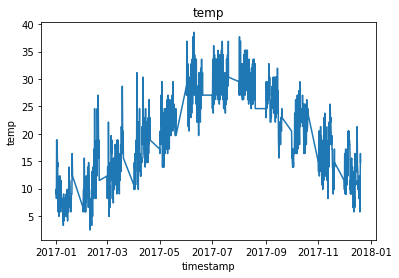

In [117]:
#QUESTION 3
#To determine if there is any seasonal or cyclic pattern in the temp, humidity, windspeed, or demand data in 2017

import pandas as pd #importing pandas 
import matplotlib.pyplot as plt # import matplotlib
# reading the carsharing file 
data = pd.read_csv(r'C:\Users\pc\Desktop\SQL\CarSharing.csv')
removed_data_dublicate = data.drop_duplicates()  # remove duplicates from data 
removed_data_null = removed_data_dublicate.dropna() # remove rows where values are null
removed_data_null['timestamp'] = pd.to_datetime(removed_data_null['timestamp']) # converted timestamp to date object
removed_data_null['year'] = removed_data_null['timestamp'].dt.year # created a new column 'year'
#print(removed_data_null['year'])
y = removed_data_null[removed_data_null['year']== 2017]['temp']  # extract temp data for 2017
x = removed_data_null[removed_data_null['year']== 2017]['timestamp'] # extract timestamp data for 2017 
#print(y)
plt.plot(x,y)
plt.ylabel('temp')
plt.xlabel('timestamp')
plt.title('temp')
plt.show()

In [121]:
#QUESTION 4
#cUsing ARIMA model to predict weekly average demand rate 

from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import pandas as pd

data = pd.read_csv(r'C:\Users\pc\Desktop\SQL\CarSharing.csv')
removed_data_duplicate = data.drop_duplicates()  # remove duplicates from data 
removed_data_null = removed_data_duplicate.dropna() # remove rows where values are null
demand_rate = list(removed_data_null['demand'])

# Generate some data
percent_data = int(len(demand_rate)*0.3)
new_data = np.random.choice(percent_data)

# Fit the model
model = ARIMA(new_data, order=(1,1,1))
model_fit = model.fit(disp=False)

# Make predictions
predictions = model_fit.predict(start=len(new_data), end=len(new_data)+10, dynamic=False)
print(predictions)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [119]:
#QUESTION 6
#categorization of demand rate 

import pandas as pd #importing pandas 
import numpy as np
# reading the carsharing file 
data = pd.read_csv(r'C:\Users\pc\Desktop\SQL\CarSharing.csv')
removed_data_dublicate = data.drop_duplicates()  # remove duplicates from data 
removed_data_null = removed_data_dublicate.dropna() # remove rows where values are null
demand_rate = removed_data_null['demand']
demand_rate_average = demand_rate.mean() # find mean
label1 = []
label2 = []
for rate in demand_rate:       # spliting the demand rate to get label 1 and 2
    if rate > demand_rate_average:
        label1.append(rate)
    else:
        label2.append(rate)

print(label1)
print(label2)

[4.543294782270004, 4.663439094112067, 4.700480365792417, 4.532599493153256, 5.0369526024136295, 4.477336814478207, 5.056245805348308, 5.056245805348308, 4.700480365792417, 4.543294782270004, 5.187385805840755, 4.574710978503383, 5.356586274672012, 5.204006687076795, 4.718498871295094, 4.477336814478207, 5.272999558563747, 4.48863636973214, 5.247024072160486, 5.1298987149230735, 4.882801922586371, 4.48863636973214, 5.389071729816501, 4.454347296253507, 5.147494476813453, 5.093750200806762, 5.3471075307174685, 4.897839799950911, 5.231108616854587, 4.812184355372417, 4.553876891600541, 4.584967478670572, 4.624972813284271, 4.553876891600541, 4.5217885770490405, 5.236441962829949, 5.181783550292085, 5.043425116919247, 4.553876891600541, 5.37989735354046, 4.867534450455582, 4.912654885736052, 4.553876891600541, 4.852030263919617, 4.919980925828125, 5.308267697401205, 4.934473933130692, 5.087596335232384, 4.969813299576001, 4.59511985013459, 5.062595033026967, 4.762173934797756, 4.499809670

C:\Users\pc\AppData\Local\Temp\ipykernel_24216\902471710.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_data_null['timestamp'] = pd.to_datetime(removed_data_null['timestamp']) # converted timestamp to date object
C:\Users\pc\AppData\Local\Temp\ipykernel_24216\902471710.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_data_null['year'] = removed_data_null['timestamp'].dt.year # created a new column 'year'


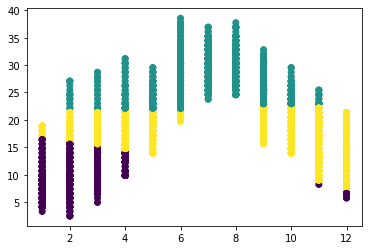

In [122]:
#QUESTION 7

import pandas as pd #importing pandas 
import matplotlib.pyplot as plt # import matplotlib
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import numpy as np

# reading the carsharing file 
data = pd.read_csv(r'C:\Users\pc\Desktop\SQL\CarSharing.csv')
removed_data_dublicate = data.drop_duplicates()  # remove duplicates from data 
removed_data_null = removed_data_dublicate.dropna() # remove rows where values are null
removed_data_null['timestamp'] = pd.to_datetime(removed_data_null['timestamp']) # converted timestamp to date object
removed_data_null['year'] = removed_data_null['timestamp'].dt.year # created a new column 'year'
#print(removed_data_null['year'])
y = removed_data_null[removed_data_null['year']== 2017]['temp'] # extract temp data for 2017
x = removed_data_null[removed_data_null['year']== 2017]['timestamp'].dt.month# extract date data from timestamp  data for 2017 
data = np.column_stack((x,y))
#kmeans = KMeans(n_clusters=2)
kmeans = KMeans(n_clusters=3)
#kmeans = KMeans(n_clusters=4)
#kmeans = KMeans(n_clusters=12)

kmeans.fit(data)

plt.scatter(x,y, c=kmeans.labels_)
plt.show()

In [11]:
import numpy as np
import pandas as pd

from jupyter_datatables import init_datatables_mode

init_datatables_mode()
print(data.head(50))

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

    id            timestamp  season holiday workingday  \
0    1  2017-01-01 00:00:00  spring      No         No   
1    2  2017-01-01 01:00:00  spring      No         No   
2    3  2017-01-01 02:00:00  spring      No         No   
3    4  2017-01-01 03:00:00  spring      No         No   
4    5  2017-01-01 04:00:00  spring      No         No   
5    6  2017-01-01 05:00:00  spring      No         No   
6    7  2017-01-01 06:00:00  spring      No         No   
7    8  2017-01-01 07:00:00  spring      No         No   
8    9  2017-01-01 08:00:00  spring      No         No   
9   10  2017-01-01 09:00:00  spring      No         No   
10  11  2017-01-01 10:00:00  spring      No         No   
11  12  2017-01-01 11:00:00  spring      No         No   
12  13  2017-01-01 12:00:00  spring      No         No   
13  14  2017-01-01 13:00:00  spring      No         No   
14  15  2017-01-01 14:00:00  spring      No         No   
15  16  2017-01-01 15:00:00  spring      No         No   
16  17  2017-0